In [1]:
import requests
import urllib.parse
user_route =  'https://api.spotify.com/v1/users/apumt5c473drtmazgp32oqgos/playlists'
auth_token = 'BQC5UZFY38o2QcZgtYy1N5YwjXv4LdzMmYaWlWalEIzHmuAaydboPwdGKmSLXl-_tNOweuuHm19JkDy2OzKBponb4jkIZup3gU2axvT5hxTJOEegN1fuge66ZAnD6agFWy0w0qkP92SQLV7QBB-_wDETJc-2mepwYhyXBboe581PQZTlvu7HyOOnsGoA5a1fzI7GRB508kjCHQ8h05fes2Hyc1k6ZKyhYLafqzDKjRvoEOZAVrmTEbsMqyw03kao'
#  POST https://api.spotify.com/v1/users/{user_id}/playlists
get_albums_route = 'https://api.spotify.com/v1/search?query=the&type=artist&limit=50'
auth_token = 'BQC5UZFY38o2QcZgtYy1N5YwjXv4LdzMmYaWlWalEIzHmuAaydboPwdGKmSLXl-_tNOweuuHm19JkDy2OzKBponb4jkIZup3gU2axvT5hxTJOEegN1fuge66ZAnD6agFWy0w0qkP92SQLV7QBB-_wDETJc-2mepwYhyXBboe581PQZTlvu7HyOOnsGoA5a1fzI7GRB508kjCHQ8h05fes2Hyc1k6ZKyhYLafqzDKjRvoEOZAVrmTEbsMqyw03kao'
response = requests.get('https://api.spotify.com/v1/search?query=the&type=artist&limit=50')
data = response.json()

In [2]:
from urllib import response


def create_spotify_playlist(name, public):
    response = requests.post(
        user_route, 
        headers={
            "Authorization": f"Bearer {auth_token}"
        },
        json={
            "name": name,
            "public": public,
            "description": "New playlist description"
        }
 
    )
    json_resp = response.json()
    return json_resp
def main():
    playlist = create_spotify_playlist(name="python created playlist", public=True)
    print(f"PLaylist: {playlist}")

In [3]:
from email import header
import json


class SpotifyAct():
    def __init__(self) -> None:
        self.auth_token = auth_token
    def search_song(self,song_name,artist):
        query = urllib.parse.quote(f'{artist} {song_name}')
        search = f"https://api.spotify.com/v1/search?query={query}"
        response = requests.get(
            search, 
            headers={
                "Content-Type": "application/json",
                "Authorization": f"Bearer {self.auth_token}"
            }
        )
        return response.json()

In [4]:
#import base64
#client_creds_b64 = base64.b64encode(client_creds.encode())

#token_data = {
 #   "grant_type": "client_credentials"
#}
#token_headers = {
 #   "Authorization": f"Basic {client_creds_b64.decode()}" 
#}
#r = requests.post(token_url, data=token_data, headers=token_headers)
#valid_request = r.status_code in range(200, 299)


In [5]:
import datetime
from logging import exception
from urllib.parse import urlencode
from sqlalchemy import null
import base64 


class SpotifyLogin(object):
    acssess_token = None
    acssess_token_expires = datetime.datetime.now()
    acsess_token_expired = True
    client_id = None
    client_secret = None
    token_url = "https://accounts.spotify.com/api/token"


    def __init__(self,client_id,client_secret,*args,**kwargs) -> None:
        super().__init__(*args, **kwargs)
        #Just so your rember, super calls the parents, *args gets all args, **kwargs gets all keyword argumeents, so like pairs like a dict
        self.client_id = client_id
        self.client_secret = client_secret
    
    def create_b64(self):
        #Returns base64 encoded string(required by spotofy ig)
        client_id = self.client_id
        client_secret = self.client_secret
        #you have to call self to make sure you're reffering to the shit in the class when you're getting it within this functuoin, same with any functoin below
        if client_secret == None or client_id == None:
            raise exception("You did not set client_id or client_secret, or I messed up and should go back to wroking at taco bell")

        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()

    def get_token_header(self):
        #returns the required header information
        client_creds_b64 = self.create_b64()
        return {
    "Authorization": f"Basic {client_creds_b64}" 
}
    def get_token_data(self):
        #returns required tokendata
        return {
    "grant_type": "client_credentials"
}

    def handle_response(self,r):
         token_response_data = r.json()
         now = datetime.datetime.now()
         access_token = token_response_data['access_token'] 
         expires_in = token_response_data['expires_in'] # seconds
         expires = now + datetime.timedelta(seconds=expires_in)
         self.acssess_token_expires = expires
         self.acssess_token = access_token
         #This is resetting the main class expires, i think
         self.acsess_token_expired = expires < now


    def test_auth(self):
        token_url = self.token_url
        token_headers = self.get_token_header()
        token_data = self.get_token_data( )

        r = requests.post(token_url, data=token_data, headers=token_headers)
        valid_request = r.status_code in range(200, 299)
        if not valid_request:
            return False
        
        self.handle_response(r)
        return True

    def get_accsess_token(self):
        token = self.acssess_token
        token_expires = self.acssess_token_expires
        if token_expires < datetime.datetime.now():
            self.test_auth()
            return self.get_accsess_token
        return token

    def get_link(self,_id,resource_type="albums",version='v1'):
        endpoint = f"https://api.spotify.com/{version}/{resource_type}/{_id}"
        print(endpoint)
        header_thing = self.get_resource_header()
        r = requests.get(endpoint, headers=header_thing)
        if r.status_code not in range(200,299):
            return endpoint
        return r.json()


    def get_resource_header(self):
         auth_token = self.get_accsess_token()
         header = {
    "Authorization": f"Bearer {auth_token}"
}
         return header

    def search_something(self,query,search_type):
        auth_token = self.get_accsess_token()
        header = self.get_resource_header()
        endpoint = 'https://api.spotify.com/v1/search'
        data_dict = {'q': query, 'type': search_type}
        search_data = urlencode(data_dict)
        search = f"{endpoint}?{search_data}"
        r = requests.get(search, headers=header)
        if r.status_code not in range(200,299):
            return None
        return r.json()


    def search_something2(self,query,search_type):
        if query == None:
            raise Exception('Please enter a query')
        if isinstance(query, dict):
            query = " ".joing(f"{key}:{value}" for key,value in query.items())


        auth_token = self.get_accsess_token()
        header = self.get_resource_header()
        endpoint = 'https://api.spotify.com/v1/search'
        data_dict = {'q': query, 'type': search_type}
        search_data = urlencode(data_dict)
        search = f"{endpoint}?{search_data}"
        r = requests.get(search, headers=header)
        if r.status_code not in range(200,299):
            return None
        return r.json()

    def get_album(self,_id):
        return self.get_link(_id,resource_type='albums')
    def get_artist(self,_id):
        return self.get_link(_id,resource_type='artists')
    def get_track(self,_id):
        return self.get_link(_id,resource_type='tracks')
        


In [6]:
client_id = '4e3d2cc9dfe2450890181834312c968d'
client_secret = '4bdae51c78e84281ba04e1658a0d41f5'
redirect_uri = 'https://localhost:8080/callback'
client = SpotifyLogin(client_id,client_secret)
print(client.test_auth())
auth_token = client.acssess_token
print(auth_token)
song = client.search_something(query= 'time', search_type = 'track')
client.search_something(query='album',search_type='album')
#https://open.spotify.com/album/1NHmvDgdWGAAq9XEf4gCdr?si=HBY8kdSfRW-w_IdabDOgdw

True
BQCGACvDZRRvjD63jWZcPD4pHCvfCVUjLJZy3cVwrYi1G9m78oek_DqCHeRnE2mYNhWed9CLQZUm_NFmBNCk1pro4jz9E8znu95YLt5Y_ENAngDlq6g


{'albums': {'href': 'https://api.spotify.com/v1/search?query=album&type=album&offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4oUHIQIBe0LHzYfvXNW4QM'},
      'href': 'https://api.spotify.com/v1/artists/4oUHIQIBe0LHzYfvXNW4QM',
      'id': '4oUHIQIBe0LHzYfvXNW4QM',
      'name': 'Morgan Wallen',
      'type': 'artist',
      'uri': 'spotify:artist:4oUHIQIBe0LHzYfvXNW4QM'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',

In [7]:
client.get_artist('0TnOYISbd1XYRBk9myaseg')

https://api.spotify.com/v1/artists/0TnOYISbd1XYRBk9myaseg


{'external_urls': {'spotify': 'https://open.spotify.com/artist/0TnOYISbd1XYRBk9myaseg'},
 'followers': {'href': None, 'total': 9529468},
 'genres': ['dance pop', 'latin', 'miami hip hop', 'pop', 'pop rap'],
 'href': 'https://api.spotify.com/v1/artists/0TnOYISbd1XYRBk9myaseg',
 'id': '0TnOYISbd1XYRBk9myaseg',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb2dc40ac263ef07c16a95af4e',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051742dc40ac263ef07c16a95af4e',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1782dc40ac263ef07c16a95af4e',
   'width': 160}],
 'name': 'Pitbull',
 'popularity': 82,
 'type': 'artist',
 'uri': 'spotify:artist:0TnOYISbd1XYRBk9myaseg'}

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = '4e3d2cc9dfe2450890181834312c968d'
client_secret = '4bdae51c78e84281ba04e1658a0d41f5'
redirect_uri = 'https://localhost:8080/callback'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

def get_artist_id(artist): 
    artist_search = sp.search(artist)
    itesm = artist_search.get('tracks')
    thign = itesm.get('items')
    for thing in thign:
        aritst_sec = thing.get('artists')
    for element in aritst_sec:
        artist_id = element.get('id')
    return artist_id

def filter_albums(album_list):
    new_album_list = [*set(album_list)]
    for album in new_album_list:
        if (album+' (Deluxe)') in new_album_list:
            removeable_element = album+' (Deluxe)'
            new_album_list.remove(removeable_element)
        if (album+' (Edited Version)') in new_album_list:
            removeable_element = (album+' (Edited Version)')
            new_album_list.remove(removeable_element)
        if (album+' (Explicit Version)') in new_album_list:
            removeable_element = album+' (Explicit Version)'
            new_album_list.remove(removeable_element)
    return new_album_list

def get_albums_by_artist(artist_id):
    artist_uri = 'spotify:artist:'+artist_id

    results = sp.artist_albums(artist_uri, album_type='album')
    albums = results['items']
    while results['next']:
        
        results = spotify.next(results)
        albums.extend(results['items'])
    album_list = []
    for album in albums:
        album_list.append(album['name'])
    return filter_albums(album_list)
def get_id(query,type):
    artist_search = sp.search(q=query,type=type)
    itesm = artist_search.get('tracks')
    thign = itesm.get('items')
    for thing in thign:
        aritst_sec = thing.get('artists')
    for element in aritst_sec:
        artist_id = element.get('id')
    return artist_id
    


#bb_albums = get_albums_by_artist(get_artist_id('Beach Bunny'))
get_id('Artic Monkeys','artists')

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'Artic Monkeys', 'limit': 10, 'offset': 0, 'type': 'artists', 'market': None} returned 400 due to Bad search type field artists


SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=Artic+Monkeys&limit=10&offset=0&type=artists:
 Bad search type field artists, reason: None

In [ ]:
def graph_album_song_pop(mon):
    mon = sp.search(mon,type='album',limit=1)
    mon = mon.get('albums')
    mon = mon.get('items')
    for item in mon:
        mon = item
    id = mon.get('id')
    return id


id = graph_album_song_pop('Monster')

#print(mon)


def get_song_pop(song_list):
    pass
album_songs = sp.album_tracks(id)
#print(album_songs)
#get_artist_id(album_songs)

#tracks = tracks.get('items')


#sp.search(q=input(),type='album')
#sp.artist_related_artists
#sp.audio_analysis(track_id=song_test)

In [ ]:
#sp.search('Another Piece of Cake',type='track',limit=1)

In [ ]:
def get_songs_id(album): 
    album_songs_items = album_songs.get('items')
    id_list= []
    for thing in album_songs_items:
        id = thing.get('id')
        id_list.append(id)
    print(id_list)
    return id_list
#for key,value in album_songs.items():
 #   print('key',key)
  #  print('')
   # print('value',value)

def get_popularity(id_list):
    song_dict = []
    for id in id_list:
        id_info = client.get_track(id)
        song_dict.append(id_info)
        #print(id_info)
    return song_dict
#sp.artist_top_tracks

ugh = get_popularity(get_songs_id( graph_album_song_pop('The Quuen Is Dead')))

['2MQKz1L6RVedUv9xeSxty8', '4NeioZ97QrelO02IXj4uYf', '2ML7vSeIZEmOCOiLUmz7Sv', '6ZyGbXhAdXKBDGo0rS2G2R', '6UgVTEP2WQl1okEuImI8Hg', '1R12cEzkDD40twWg50l3qS', '3KBV7tSnPTTbnshytvafTB', '7gBQgznbpI6iqEprmeSfI9', '7EtAE242kivzlxxOAL29bS', '4j5Tpz0Vm8vPNZT0pMyQF5', '7HIKmGolnSy0nr7G594dvi', '5f4l6XBwP6fhOcXZw4Ne26', '0joQFwiBKmi6X1Iq5R1ubH']
https://api.spotify.com/v1/tracks/2MQKz1L6RVedUv9xeSxty8
https://api.spotify.com/v1/tracks/4NeioZ97QrelO02IXj4uYf
https://api.spotify.com/v1/tracks/2ML7vSeIZEmOCOiLUmz7Sv
https://api.spotify.com/v1/tracks/6ZyGbXhAdXKBDGo0rS2G2R
https://api.spotify.com/v1/tracks/6UgVTEP2WQl1okEuImI8Hg
https://api.spotify.com/v1/tracks/1R12cEzkDD40twWg50l3qS
https://api.spotify.com/v1/tracks/3KBV7tSnPTTbnshytvafTB
https://api.spotify.com/v1/tracks/7gBQgznbpI6iqEprmeSfI9
https://api.spotify.com/v1/tracks/7EtAE242kivzlxxOAL29bS
https://api.spotify.com/v1/tracks/4j5Tpz0Vm8vPNZT0pMyQF5
https://api.spotify.com/v1/tracks/7HIKmGolnSy0nr7G594dvi
https://api.spotify.com/v1/tracks/

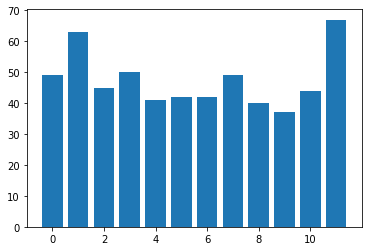

In [ ]:
import datetime
from logging import exception
from multiprocessing.connection import Client
from urllib.parse import urlencode
from sqlalchemy import null
import base64 
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import matplotlib.pyplot as plt

class SpotifyLogin(object):
    acssess_token = None
    acssess_token_expires = datetime.datetime.now()
    acsess_token_expired = True
    client_id = None
    client_secret = None
    token_url = "https://accounts.spotify.com/api/token"


    def __init__(self,client_id,client_secret,*args,**kwargs) -> None:
        super().__init__(*args, **kwargs)
        #Just so your rember, super calls the parents, *args gets all args, **kwargs gets all keyword argumeents, so like pairs like a dict
        self.client_id = client_id
        self.client_secret = client_secret
    
    def create_b64(self):
        #Returns base64 encoded string(required by spotofy ig)
        client_id = self.client_id
        client_secret = self.client_secret
        #you have to call self to make sure you're reffering to the shit in the class when you're getting it within this functuoin, same with any functoin below
        if client_secret == None or client_id == None:
            raise exception("You did not set client_id or client_secret, or I messed up and should go back to wroking at taco bell")

        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()

    def get_token_header(self):
        #returns the required header information
        client_creds_b64 = self.create_b64()
        return {
    "Authorization": f"Basic {client_creds_b64}" 
}
    def get_token_data(self):
        #returns required tokendata
        return {
    "grant_type": "client_credentials"
}

    def handle_response(self,r):
         token_response_data = r.json()
         now = datetime.datetime.now()
         access_token = token_response_data['access_token'] 
         expires_in = token_response_data['expires_in'] # seconds
         expires = now + datetime.timedelta(seconds=expires_in)
         self.acssess_token_expires = expires
         self.acssess_token = access_token
         #This is resetting the main class expires, i think
         self.acsess_token_expired = expires < now


    def test_auth(self):
        token_url = self.token_url
        token_headers = self.get_token_header()
        token_data = self.get_token_data( )

        r = requests.post(token_url, data=token_data, headers=token_headers)
        valid_request = r.status_code in range(200, 299)
        if not valid_request:
            return False
        
        self.handle_response(r)
        return True

    def get_accsess_token(self):
        token = self.acssess_token
        token_expires = self.acssess_token_expires
        if token_expires < datetime.datetime.now():
            self.test_auth()
            return self.get_accsess_token
        return token

    def get_link(self,_id,resource_type="albums",version='v1'):
        endpoint = f"https://api.spotify.com/{version}/{resource_type}/{_id}"
        header_thing = self.get_resource_header()
        r = requests.get(endpoint, headers=header_thing)
        if r.status_code not in range(200,299):
            return endpoint
        return r.json()


    def get_resource_header(self):
         auth_token = self.get_accsess_token()
         header = {
    "Authorization": f"Bearer {auth_token}"
}
         return header

    def search_something(self,query,search_type):
        auth_token = self.get_accsess_token()
        header = self.get_resource_header()
        endpoint = 'https://api.spotify.com/v1/search'
        data_dict = {'q': query, 'type': search_type}
        search_data = urlencode(data_dict)
        search = f"{endpoint}?{search_data}"
        r = requests.get(search, headers=header)
        if r.status_code not in range(200,299):
            return None
        return r.json()


    def search_something2(self,query,search_type):
        if query == None:
            raise Exception('Please enter a query')
        if isinstance(query, dict):
            query = " ".joing(f"{key}:{value}" for key,value in query.items())


        auth_token = self.get_accsess_token()
        header = self.get_resource_header()
        endpoint = 'https://api.spotify.com/v1/search'
        data_dict = {'q': query, 'type': search_type}
        search_data = urlencode(data_dict)
        search = f"{endpoint}?{search_data}"
        r = requests.get(search, headers=header)
        if r.status_code not in range(200,299):
            return None
        return r.json()

    def get_album(self,_id):
        return self.get_link(_id,resource_type='albums')
    def get_artist(self,_id):
        return self.get_link(_id,resource_type='artists')
    def get_track(self,_id):
        return self.get_link(_id,resource_type='tracks')
        



class SpotipyConnection(object):
    client_id = None
    client_secret = None
    def __init__(self,client_id,client_secret,*args,**kwargs) -> None:
        super().__init__(*args, **kwargs)
        #Just so your rember, super calls the parents, *args gets all args, **kwargs gets all keyword argumeents, so like pairs like a dict
        self.client_id = client_id
        self.client_secret = client_secret
    
    #Creates object of spotipy library. can't put it in init function for some reason, how do I set it and forget it and not have to call the function?
    def create_obj(self):
         client_credentials_manager = SpotifyClientCredentials(client_id=self.client_id, client_secret=self.client_secret)
         sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API  
         return sp    
    #Gets artist id when you search it
    #Pretty ineffcient tbh, could probably do it within client object so no need for this
    #artist = Your query
    def get_artist_id(self,artist): 
        sp = self.create_obj()
        artist_search = sp.search(artist)
        itesm = artist_search.get('tracks')
        thign = itesm.get('items')
        for thing in thign:
            aritst_sec = thing.get('artists')
        for element in aritst_sec:
            artist_id = element.get('id')
        return artist_id

    #This takes out deluxe, edited and explicit variations of the albums when you insert an artists discography
    #album _list = list of album names, probably from get_albums_by artists
    def filter_albums(self,album_list):
        sp = self.create_obj()
        new_album_list = [*set(album_list)]
        for album in new_album_list:
            if (album+' (Deluxe)') in new_album_list:
                removeable_element = album+' (Deluxe)'
                new_album_list.remove(removeable_element)
            if (album+' (Edited Version)') in new_album_list:
                removeable_element = (album+' (Edited Version)')
                new_album_list.remove(removeable_element)
            if (album+' (Explicit Version)') in new_album_list:
                removeable_element = album+' (Explicit Version)'
                new_album_list.remove(removeable_element)
        return new_album_list

#This gets all albums from an artist of type album by the artist id
#requires you to call get_artist_id before or client.get_artist
#we could use this later to graph album popularity when you total those bitches up for each album know what I'm saying?
#artist_id = id of artist
    def get_albums_by_artist(self,artist_id):
        artist_uri = 'spotify:artist:'+artist_id
        sp = self.create_obj()
        results = sp.artist_albums(artist_uri, album_type='album')
        albums = results['items']
        while results['next']:
            results = sp.next(results)
            albums.extend(results['items'])
        album_list = []
        for album in albums:
            album_list.append(album['name'])
        return self.filter_albums(album_list)

#I ain't gonna lie, this don't look like this work and I didn't use it in the juypter notebook but imma keep it here cause why not. I could fix it if I cared enough
#Searches by query with type specificity
#query= what you want to search
#Type = type of what you want to search, like album track artist etc
    def get_id(self,query,type):
        sp = self.create_obj()
        #I have to initialize this at the start of every function, how do i set it and forget it
        artist_search = sp.search(q=query,type=type)
        itesm = artist_search.get('tracks')
        thign = itesm.get('items')
        for thing in thign:
            aritst_sec = thing.get('artists')
        for element in aritst_sec:
            artist_id = element.get('id')
        return artist_id

#This searches for an album, gets the first one that comes up, and gets the id of each song. For some reason it doesn't give you the pop of each album in here so you have to search up each song indiviually
#As input put in your query
#mon=your album query, suht up dumb name ik
#These just sort through the the stuff that album_song_pop returns
# ugh = get_popularity(get_songs_id( get_album_song_pop('Monster')))
# Call it like that, basically gets you a list of all song ids 
    def get_album_song_pop(self,mon):
        sp = self.create_obj()
        mon = sp.search(mon,type='album',limit=1)
        mon = mon.get('albums')
        mon = mon.get('items')
        for item in mon:
            mon = item
        id = mon.get('id')
        return id
    def get_songs_id(self,album): 
        sp = self.create_obj()
        album = sp.album_tracks(album)
        album_songs_items = album.get('items')
        id_list= []
        for thing in album_songs_items:
            id = thing.get('id')
            id_list.append(id)
        return id_list
    def get_popularity(self,id_list):
        song_dict = []
        client = SpotifyLogin(self.client_id,self.client_secret)
        for id in id_list:
            id_info = client.get_track(id)
            song_dict.append(id_info)
            #print(id_info)
        song_dict = list(song_dict)
        return song_dict
#This gets the populartiy and names of each song, pop the value song the key
#put in list of ids from above functions
    def get_song_pop(self,album):
        pop_song_dict = {}
        pop_list = []
        song_list = []
        for thing in album:
            if (type(thing) != str):
                pop_list.append(thing.get('popularity'))
                song_list.append(thing.get('name'))
 
        for song,pop in zip(song_list,pop_list):
            pop_song_dict[song] = pop
        return pop_song_dict
#Pass in the dicionary for stats
#This will graph a interacatable hover graph with the name displauing over the thing y'know
#It shows it in the last line idk if you wanna do that
# ugh = graph_pop_songs(get_song_pop(get_popularity(get_songs_id( get_album_song_pop('Monster')))))
#this the full thing
    def graph_pop_songs(self,stats):
        company=list(stats.keys())
        revenue=list(stats.values())

        fig=plt.figure()
        ax=plt.subplot()

        xpos=np.arange(len(company))

        bars = plt.bar(xpos,revenue)


        annot = ax.annotate("", xy=(5,0), xytext=(-20,20),textcoords="offset points",
                            bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                            arrowprops=dict(arrowstyle="->"))
        annot.set_visible(False)

        def update_annot(bar):
            x = round(bar.get_x()+bar.get_width())
            y = bar.get_y()+bar.get_height()
            annot.xy=(x,y)
            x = company[x]
        

            text = (x,y)
            annot.set_text(text)
            annot.get_bbox_patch().set_alpha(0.4)
        def hover(event):
            vis = annot.get_visible()
            if event.inaxes == ax:
                for bar in bars:
                    cont, ind = bar.contains(event)
                    if cont:
                        update_annot(bar)
                        annot.set_visible(True)
                        fig.canvas.draw_idle()
                        return
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

        fig.canvas.mpl_connect("motion_notify_event", hover)

        plt.show()
    def graph_pop_songs_full(self,query):
        self.graph_pop_songs(self.get_song_pop(self.get_popularity(self.get_songs_id(self.get_album_song_pop(query)))))
    def rehehe(self,query):
        return self.get_popularity(self.get_songs_id(self.get_album_song_pop(query)))
client_id = '4e3d2cc9dfe2450890181834312c968d'
client_secret = '4bdae51c78e84281ba04e1658a0d41f5'
thing = SpotipyConnection(client_id=client_id,client_secret=client_secret)
#thing23 = thing.rehehe('Monster')
thing.graph_pop_songs_full('Monster')



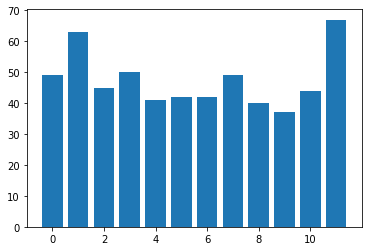

In [ ]:
import datetime
from logging import exception
from multiprocessing.connection import Client
from urllib.parse import urlencode
from sqlalchemy import null
import base64 
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import matplotlib.pyplot as plt

class SpotifyLogin(object):
    acssess_token = None
    acssess_token_expires = datetime.datetime.now()
    acsess_token_expired = True
    client_id = None
    client_secret = None
    token_url = "https://accounts.spotify.com/api/token"


    def __init__(self,client_id,client_secret,*args,**kwargs) -> None:
        super().__init__(*args, **kwargs)
        #Just so your rember, super calls the parents, *args gets all args, **kwargs gets all keyword argumeents, so like pairs like a dict
        self.client_id = client_id
        self.client_secret = client_secret
    
    def create_b64(self):
        #Returns base64 encoded string(required by spotofy ig)
        client_id = self.client_id
        client_secret = self.client_secret
        #you have to call self to make sure you're reffering to the shit in the class when you're getting it within this functuoin, same with any functoin below
        if client_secret == None or client_id == None:
            raise exception("You did not set client_id or client_secret, or I messed up and should go back to wroking at taco bell")

        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()

    def get_token_header(self):
        #returns the required header information
        client_creds_b64 = self.create_b64()
        return {
    "Authorization": f"Basic {client_creds_b64}" 
}
    def get_token_data(self):
        #returns required tokendata
        return {
    "grant_type": "client_credentials"
}

    def handle_response(self,r):
         token_response_data = r.json()
         now = datetime.datetime.now()
         access_token = token_response_data['access_token'] 
         expires_in = token_response_data['expires_in'] # seconds
         expires = now + datetime.timedelta(seconds=expires_in)
         self.acssess_token_expires = expires
         self.acssess_token = access_token
         #This is resetting the main class expires, i think
         self.acsess_token_expired = expires < now


    def test_auth(self):
        token_url = self.token_url
        token_headers = self.get_token_header()
        token_data = self.get_token_data( )

        r = requests.post(token_url, data=token_data, headers=token_headers)
        valid_request = r.status_code in range(200, 299)
        if not valid_request:
            return False
        
        self.handle_response(r)
        return True

    def get_accsess_token(self):
        token = self.acssess_token
        token_expires = self.acssess_token_expires
        if token_expires < datetime.datetime.now():
            self.test_auth()
            return self.get_accsess_token
        return token

    def get_link(self,_id,resource_type="albums",version='v1'):
        endpoint = f"https://api.spotify.com/{version}/{resource_type}/{_id}"
        header_thing = self.get_resource_header()
        r = requests.get(endpoint, headers=header_thing)
        if r.status_code not in range(200,299):
            return endpoint
        return r.json()


    def get_resource_header(self):
         auth_token = self.get_accsess_token()
         header = {
    "Authorization": f"Bearer {auth_token}"
}
         return header

    def search_something(self,query,search_type):
        auth_token = self.get_accsess_token()
        header = self.get_resource_header()
        endpoint = 'https://api.spotify.com/v1/search'
        data_dict = {'q': query, 'type': search_type}
        search_data = urlencode(data_dict)
        search = f"{endpoint}?{search_data}"
        r = requests.get(search, headers=header)
        if r.status_code not in range(200,299):
            return None
        return r.json()


    def search_something2(self,query,search_type):
        if query == None:
            raise Exception('Please enter a query')
        if isinstance(query, dict):
            query = " ".joing(f"{key}:{value}" for key,value in query.items())


        auth_token = self.get_accsess_token()
        header = self.get_resource_header()
        endpoint = 'https://api.spotify.com/v1/search'
        data_dict = {'q': query, 'type': search_type}
        search_data = urlencode(data_dict)
        search = f"{endpoint}?{search_data}"
        r = requests.get(search, headers=header)
        if r.status_code not in range(200,299):
            return None
        return r.json()

    def search_something2(self,query,search_type):
        if query == None:
            raise Exception('Please enter a query')
        if isinstance(query, dict):
            query = " ".joing(f"{key}:{value}" for key,value in query.items())


        auth_token = self.get_accsess_token()
        header = self.get_resource_header()
        endpoint = 'https://api.spotify.com/v1/search'
        data_dict = {'q': query, 'type': search_type}
        search_data = urlencode(data_dict)
        search = f"{endpoint}?{search_data}"
        r = requests.get(search, headers=header)
        if r.status_code not in range(200,299):
            return None
        return r.csv()
    def get_album(self,_id):
        return self.get_link(_id,resource_type='albums')
    def get_artist(self,_id):
        return self.get_link(_id,resource_type='artists')
    def get_track(self,_id):
        return self.get_link(_id,resource_type='tracks')
        



class SpotipyConnection(object):
    client_id = None
    client_secret = None
    def __init__(self,client_id,client_secret,*args,**kwargs) -> None:
        super().__init__(*args, **kwargs)
        #Just so your rember, super calls the parents, *args gets all args, **kwargs gets all keyword argumeents, so like pairs like a dict
        self.client_id = client_id
        self.client_secret = client_secret
    
    #Creates object of spotipy library. can't put it in init function for some reason, how do I set it and forget it and not have to call the function?
    def create_obj(self):
         client_credentials_manager = SpotifyClientCredentials(client_id=self.client_id, client_secret=self.client_secret)
         sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API  
         return sp    
    #Gets artist id when you search it
    #Pretty ineffcient tbh, could probably do it within client object so no need for this
    #artist = Your query
    def get_artist_id(self,artist): 
        sp = self.create_obj()
        artist_search = sp.search(artist)
        itesm = artist_search.get('tracks')
        thign = itesm.get('items')
        for thing in thign:
            aritst_sec = thing.get('artists')
        for element in aritst_sec:
            artist_id = element.get('id')
        return artist_id

    #This takes out deluxe, edited and explicit variations of the albums when you insert an artists discography
    #album _list = list of album names, probably from get_albums_by artists
    def filter_albums(self,album_list):
        sp = self.create_obj()
        new_album_list = [*set(album_list)]
        for album in new_album_list:
            if (album+' (Deluxe)') in new_album_list:
                removeable_element = album+' (Deluxe)'
                new_album_list.remove(removeable_element)
            if (album+' (Edited Version)') in new_album_list:
                removeable_element = (album+' (Edited Version)')
                new_album_list.remove(removeable_element)
            if (album+' (Explicit Version)') in new_album_list:
                removeable_element = album+' (Explicit Version)'
                new_album_list.remove(removeable_element)
        return new_album_list

#This gets all albums from an artist of type album by the artist id
#requires you to call get_artist_id before or client.get_artist
#we could use this later to graph album popularity when you total those bitches up for each album know what I'm saying?
#artist_id = id of artist
    def get_albums_by_artist(self,artist_id):
        artist_uri = 'spotify:artist:'+artist_id
        sp = self.create_obj()
        results = sp.artist_albums(artist_uri, album_type='album')
        albums = results['items']
        while results['next']:
            results = sp.next(results)
            albums.extend(results['items'])
        album_list = []
        for album in albums:
            album_list.append(album['name'])
        return self.filter_albums(album_list)

#I ain't gonna lie, this don't look like this work and I didn't use it in the juypter notebook but imma keep it here cause why not. I could fix it if I cared enough
#Searches by query with type specificity
#query= what you want to search
#Type = type of what you want to search, like album track artist etc
    def get_id(self,query,type):
        sp = self.create_obj()
        #I have to initialize this at the start of every function, how do i set it and forget it
        artist_search = sp.search(q=query,type=type)
        itesm = artist_search.get('tracks')
        thign = itesm.get('items')
        for thing in thign:
            aritst_sec = thing.get('artists')
        for element in aritst_sec:
            artist_id = element.get('id')
        return artist_id

#This searches for an album, gets the first one that comes up, and gets the id of each song. For some reason it doesn't give you the pop of each album in here so you have to search up each song indiviually
#As input put in your query
#mon=your album query, suht up dumb name ik
#These just sort through the the stuff that album_song_pop returns
# ugh = get_popularity(get_songs_id( get_album_song_pop('Monster')))
# Call it like that, basically gets you a list of all song ids 
    def get_album_song_pop(self,mon):
        sp = self.create_obj()
        mon = sp.search(mon,type='album',limit=1)
        mon = mon.get('albums')
        mon = mon.get('items')
        for item in mon:
            mon = item
        id = mon.get('id')
        return id
    def get_songs_id(self,album): 
        sp = self.create_obj()
        album = sp.album_tracks(album)
        album_songs_items = album.get('items')
        id_list= []
        for thing in album_songs_items:
            id = thing.get('id')
            id_list.append(id)
        return id_list
    def get_popularity(self,id_list):
        song_dict = []
        client = SpotifyLogin(self.client_id,self.client_secret)
        for id in id_list:
            id_info = client.get_track(id)
            song_dict.append(id_info)
            #print(id_info)
        song_dict = list(song_dict)
        return song_dict
#This gets the populartiy and names of each song, pop the value song the key
#put in list of ids from above functions
    def get_song_pop(self,album):
        pop_song_dict = {}
        pop_list = []
        song_list = []
        for thing in album:
            if (type(thing) != str):
                pop_list.append(thing.get('popularity'))
                song_list.append(thing.get('name'))
 
        for song,pop in zip(song_list,pop_list):
            pop_song_dict[song] = pop
        return pop_song_dict
#Pass in the dicionary for stats
#This will graph a interacatable hover graph with the name displauing over the thing y'know
#It shows it in the last line idk if you wanna do that
# ugh = graph_pop_songs(get_song_pop(get_popularity(get_songs_id( get_album_song_pop('Monster')))))
#this the full thing
    def graph_pop_songs(self,stats):
        company=list(stats.keys())
        revenue=list(stats.values())

        fig=plt.figure()
        ax=plt.subplot()

        xpos=np.arange(len(company))

        bars = plt.bar(xpos,revenue)


        annot = ax.annotate("", xy=(5,0), xytext=(-20,20),textcoords="offset points",
                            bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                            arrowprops=dict(arrowstyle="->"))
        annot.set_visible(False)

        def update_annot(bar):
            x = round(bar.get_x()+bar.get_width())
            y = bar.get_y()+bar.get_height()
            annot.xy=(x,y)
            x = company[x]
        

            text = (x,y)
            annot.set_text(text)
            annot.get_bbox_patch().set_alpha(0.4)
        def hover(event):
            vis = annot.get_visible()
            if event.inaxes == ax:
                for bar in bars:
                    cont, ind = bar.contains(event)
                    if cont:
                        update_annot(bar)
                        annot.set_visible(True)
                        fig.canvas.draw_idle()
                        return
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

        fig.canvas.mpl_connect("motion_notify_event", hover)

        plt.show()
    def graph_pop_songs_full(self,query):
        self.graph_pop_songs(self.get_song_pop(self.get_popularity(self.get_songs_id(self.get_album_song_pop(query)))))
    def rehehe(self,query):
        return self.get_popularity(self.get_songs_id(self.get_album_song_pop(query)))
client_id = '4e3d2cc9dfe2450890181834312c968d'
client_secret = '4bdae51c78e84281ba04e1658a0d41f5'
thing = SpotipyConnection(client_id=client_id,client_secret=client_secret)
#thing23 = thing.rehehe('Monster')
thing.graph_pop_songs_full('Monster')



In [ ]:
string = 'ggf'
if type(string) == str:
    print('2')

2


In [ ]:
def get_song_pop(album):
    pop_song_dict = {}
    pop_list = []
    song_list = []
    for thing in album:
        pop_list.append(thing.get('popularity'))
    album_songs_items = album_songs.get('items')
    for thing in album_songs_items:
        name = thing.get('name')
        song_list.append(name)
    for song,pop in zip(song_list,pop_list):
        pop_song_dict[song] = pop
    return pop_song_dict
stats = get_song_pop(ugh)

In [ ]:
class TestClass(object):
    client_id = None
    client_secret = None

    def __init__(self,client_id,client_secret,*args,**kwargs) -> None:
        super().__init__(*args, **kwargs)
        #Just so your rember, super calls the parents, *args gets all args, **kwargs gets all keyword argumeents, so like pairs like a dict
        self.client_id = client_id
        self.client_secret = client_secret
    def create_obj(self):
         client_credentials_manager = SpotifyClientCredentials(client_id=self.client_id, client_secret=self.client_secret)
         sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API  
         return sp     
    def get_artist_id(self,artist): 
        sp = self.create_obj()
        artist_search = sp.search(artist)
        itesm = artist_search.get('tracks')
        thign = itesm.get('items')
        for thing in thign:
            aritst_sec = thing.get('artists')
        for element in aritst_sec:
            artist_id = element.get('id')
        return artist_id
client_id = '4e3d2cc9dfe2450890181834312c968d'
client_secret = '4bdae51c78e84281ba04e1658a0d41f5'
thing = TestClass(client_secret=client_secret,client_id=client_id)
thing.get_artist_id('Chance the rapper')

'1anyVhU62p31KFi8MEzkbf'